# Heart Disease Dataset 
    Prevendo doenças do coração com Regressão Logística
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### Contexto:
Esse conjunto de dados data de 1988 e consiste em quatro bancos de dados: Cleveland, Hungria, Suíça e Long Beach V. Ele contém 76 atributos, incluindo o atributo previsto, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. O campo "alvo" refere-se à presença de doença cardíaca no paciente. É um valor inteiro 0 = sem doença e 1 = doença.

### Conteúdo:
1. *age*: idade em anos
2. *sex*: sexo (1 = masculino e 0 = feminino)
3. *cp*: tipo de dor no peito (Valor 1: angina típica, Valor 2: angina atípica, Valor 3: dor não-anginal, Valor 4: assintomático)
4. *trestbps*: pressão arterial em repouso (mm Hg na admissão do hospital)
5. *chol: mensuração do colesterol sérico em mg/dL
6. *fbs*: glicemia em jejum (> 120 mg/dL, 1 = verdadeiro e 0 = falso)
7. *restecg*: mensuração eletrocardiográfica em repouso (0 = normal, 1 = tendo anormalidade da onda ST-T, 2 = mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes)
8. *thalach*: frequência cardíaca máxima atingida 
9. *exang*: angina (dor no peito) induzida por exercício ( 1 = sim e 0 = não)
10. *oldpeak*: pico antigo = depressão do segmento ST (no eletrocardiograma) induzido pelo exercício em relação ao repouso
11. *slope*: a inclinição do segmento ST (no eletrocardiograma) de exercício de pico (Valor 1 = ascendente, Valor 2 = reta, Valor 3 = descendente)
12. *ca*: número de vasos principais (0-3) coloridos por fluoroscopia
13. *thal*: talassemia (distúrbio sanguíneo) pode ser 3 = normal, 6 = defeito corrigido, 7 = defeito reversível
14. *target*: doença do coração (0 = não e 1 = sim)

Os nomes e números de segurança social dos pacientes foram recentemnete removidos do banco de dados e substituídos por valores fictícios.

In [42]:
# Importação das bibliotecas 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings 
warnings.filterwarnings('ignore')

In [43]:
# Importando específicas do scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [44]:
# Informa como importar arquivo a ser usado na análise 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-dataset/heart.csv


In [45]:
# Importando dataset 'heart.csv' do Kaggle 
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [46]:
# Informações detalhadas sobre dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [47]:
# A informação acima já mostra que não há valores nulos, mas para conferir podeos usar:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [48]:
# Analisar se há ou não linhas duplicadas na tabela 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [49]:
# Como há linhas duplicadas, podemos somar e ver quantas são 
df.duplicated().sum()

723

Essas linhas duplicadas devem ser eliminadas do dataset, pois quando há entrada de dados duplicados pode causar um peso desproporcional durante o treinamento do modelo de machine learning. Pode também causar overfitting. 

In [50]:
# Para eliminar os dados duplicados 
hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [51]:
# Informações estatísticas sobre o dataset 
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Podemos tirar algumas conclusões:
* Variáveis binárias ou classificativas não há alterações
* Chol (colesterol) apresenta até 75% dos seus dados em 274.75, porém depois o número máximo chega a 564.00 (praticamente o dobro) que indica, provavelmente, presença de outliers causando essas discrepância de valores 

<AxesSubplot:>

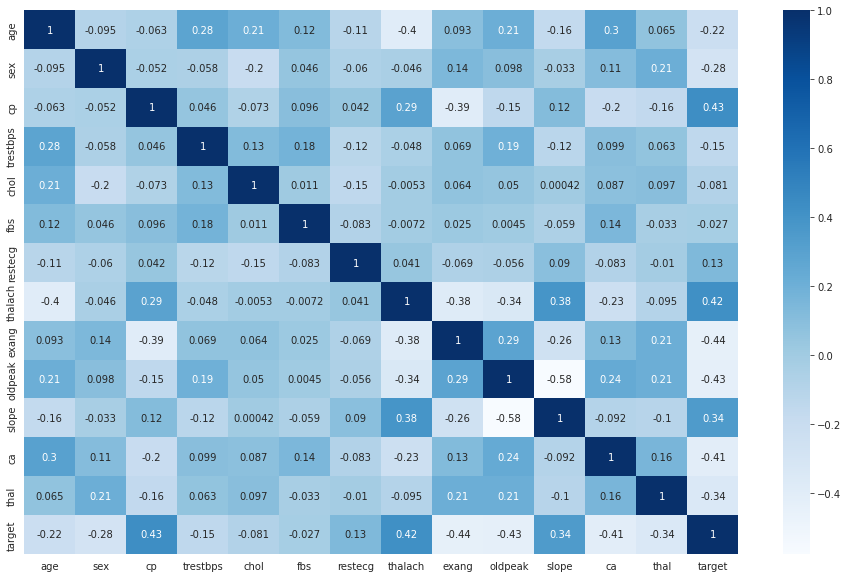

In [52]:
# Para ver a correlação entre as variáveis 
plt.figure(figsize = (16,10))
sns.heatmap(hd.corr(), annot = True, cmap = 'Blues')

Podemos ver que as maiores correlações positivas com a variável target são as variáveis 'cp', 'thalach'e 'splope'

### Gerando gráficos para análises 

In [53]:
# Separar todas as variáveis (colunas) que são categóricas e numéricas 
for c in hd.columns:
    print(f"{c}: {hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [54]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

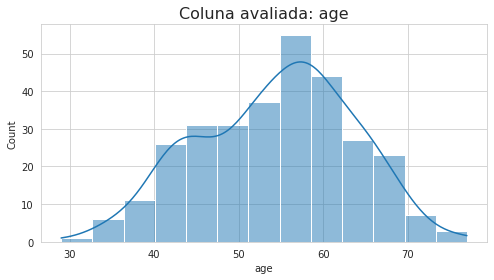

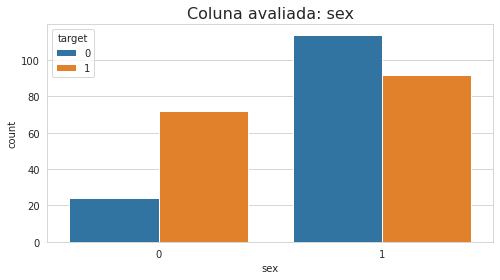

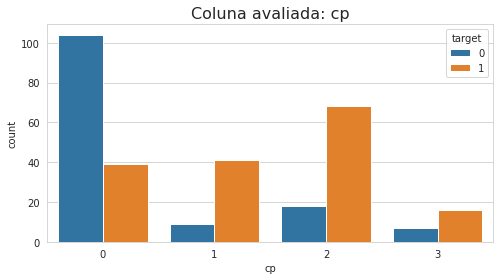

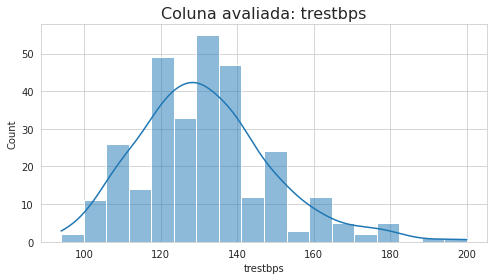

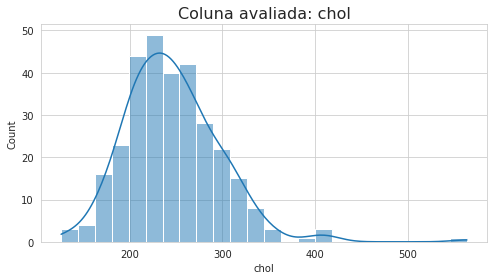

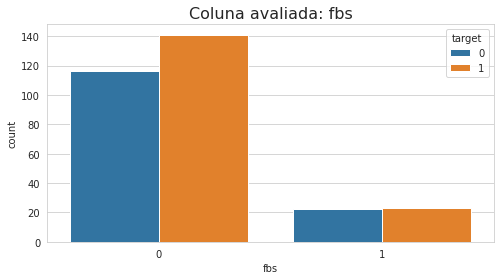

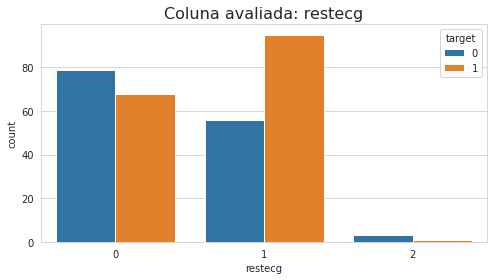

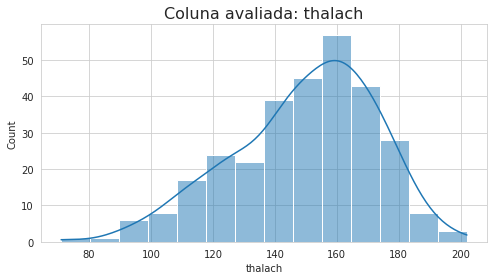

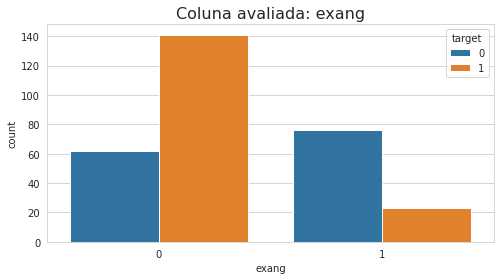

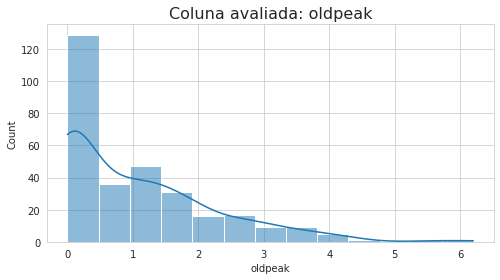

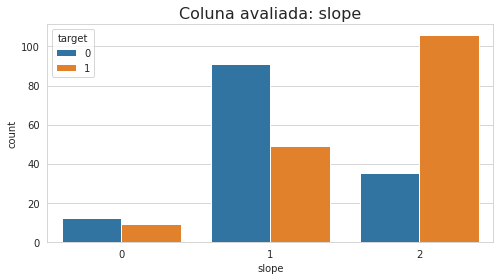

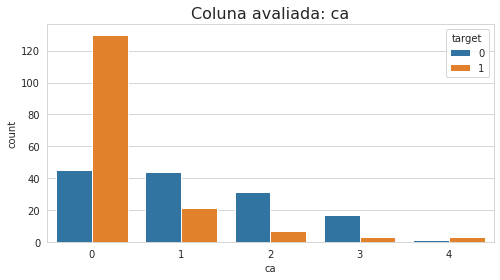

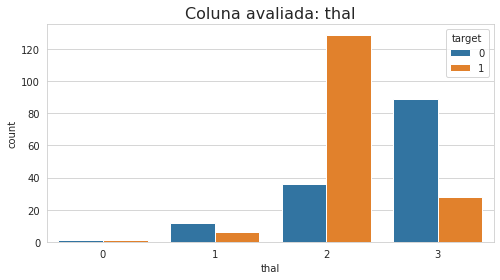

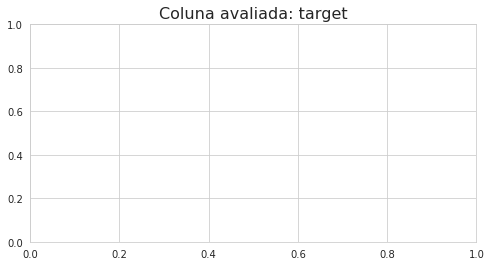

In [55]:
# Navega pelo dataset e gera gráficos diferentes para 'categoricas' e 'numericas'
for c in hd.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"Coluna avaliada: {c}", fontsize = 16)
    if c in categoricas:
        sns.countplot(x = hd[c], hue = hd['target'])
    if c in numericas:
        sns.histplot(hd[c], kde = True)

**Interpretações sobre os gráficos:**

* age: A concentração de doenças cardíacas está maior entre as idades de 48 e 61 anos 
* Há menos mulheres do que homens no dataset
* sex: Entre as mulheres, a maioria possui doença no coração e entre os homens a taxa de não tem doença no coração sobressai aos que tem
* cp: Maioria dos pacientes com angina típica não possuem doença no coração, porém os outros valores maioria que tem possui doença do coração 
* Em chol podemos oberservar outliers 
* fbs: Pacientes que possuem glicemia em jejum > 120 mg/dL mesmo tendo mais probabilidade de ter doença do coração, também tem alto índice de poder não ter. Da mesma forma se glicemia em jejum < 120 mg/dL o índice para ter ou não doença no coração é baixo
* restecg: Maioria que possui anormalidade da onda ST-T possui doença cardíaca
* exang: Pacientes que não possuem angina causada por exercício tendem a ter mais doença cardíaca
* slope: O pico de exercício se é reto é menos chance de doença do coração, porém se é descendente a chance é alta
* ca: Se não tem vasos principais coloridos com  fluoroscopia a chance de ter doenças cardíacas é muito alta
* A variável target não apresenta gráfico, pois não foi inclusa nem em numericas, nem em categoricas

### Removendo Outliers

<AxesSubplot:>

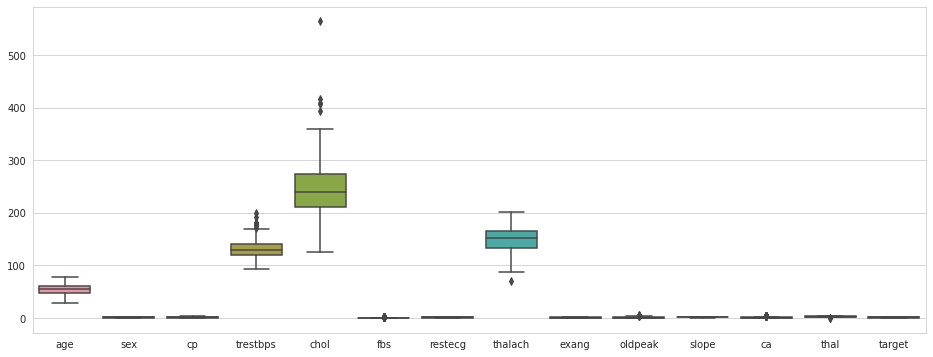

In [56]:
# Boxplots que mostram distribuições das variáveis e seus outliers 
plt.figure(figsize = (16,6))
sns.boxplot(data = hd)

In [57]:
# Ver a quantidade equivalente dos dados em 98% na variável 'trestbps'
hd['trestbps'].quantile(0.99)

180.0

Na variável *trestbps* podemos observar alguns outliers que devemos retirar. Sendo, neste caso, a retirada apenas 1% dos dados, então o máximo que antes era 200 passará a ser aproximadamente 180

In [58]:
# Remoção do 1% de outliers na variável 'trestbps' e assim o número máximo passa a ser 178
hd1 = hd[hd['trestbps'] < hd['trestbps'].quantile(0.99)]

hd1['trestbps'].describe()

count    297.000000
mean     130.680135
std       16.154304
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      178.000000
Name: trestbps, dtype: float64

In [59]:
# Ver a quantidade equivalente dos dados em 98% na variável 'chol'
hd['chol'].quantile(0.98)

353.98

In [60]:
# Remoção de outliers e assim o número máximo que era 564 passa a ser 354
hd2 = hd1[hd1['chol'] < hd1['chol'].quantile(0.98)]

hd2['chol'].describe()

count    291.000000
mean     241.907216
std       44.214699
min      126.000000
25%      210.500000
50%      239.000000
75%      270.000000
max      354.000000
Name: chol, dtype: float64

<AxesSubplot:>

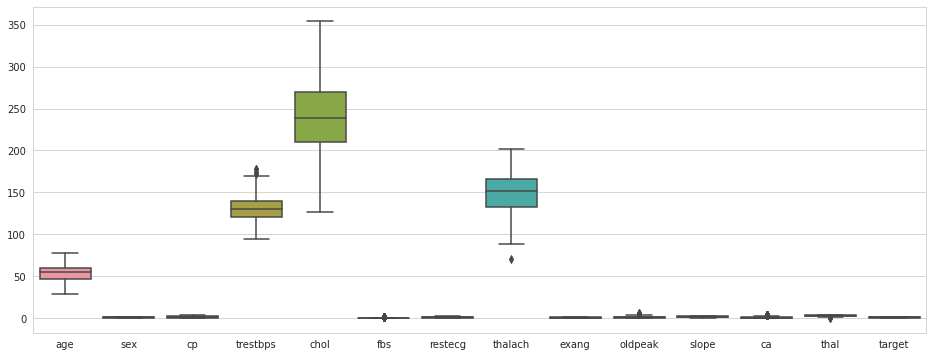

In [61]:
plt.figure(figsize = (16,6))
sns.boxplot(data = hd2)

Os outliers de 'trestbps' foram retirados parcialmente, já os da variável 'chol' foram retirados por completo. Agora podemos ver a variável 'thalach' que seus outliers não são em máximo, mas sim em mínimo, indo de 71 no mínimo a 132.50 em 25%, tendo uma boa variância que pode dar erros na predição.

In [62]:
# Ver a quantidade equivalente dos dados em 0.005% na variável 'thalach', que seria o mínimo
hd2['thalach'].quantile(0.005)

88.9

In [63]:
# Remoção de outliers e assim o número mínimo que era 71 passa a ser 90
hd3 = hd2[hd2['thalach'] > hd2['thalach'].quantile(0.005)]

hd3['thalach'].describe()

count    289.000000
mean     149.941176
std       22.378685
min       90.000000
25%      134.000000
50%      153.000000
75%      167.000000
max      202.000000
Name: thalach, dtype: float64

<AxesSubplot:>

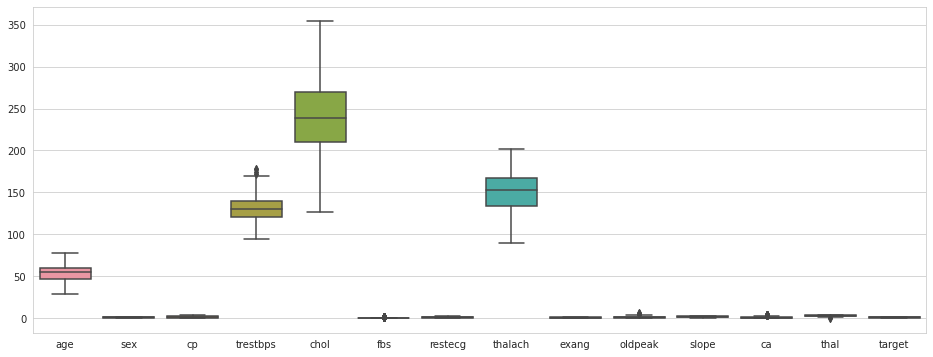

In [64]:
plt.figure(figsize = (16,6))
sns.boxplot(data = hd3)

Os outliers da variável 'thalach' foram removidos por completo. Terminando a necessidade de manipulação dos dados em relação a outliers.

In [65]:
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.103806,0.698962,0.975779,130.453287,241.813149,0.145329,0.532872,149.941176,0.321799,1.015571,1.404844,0.716263,2.304498,0.550173
std,9.062454,0.459505,1.035533,16.137174,44.326594,0.353043,0.520209,22.378685,0.467977,1.147279,0.616985,1.008185,0.615777,0.498339
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Manipulação dos dados 

Iremos usar o **get_dummies** para transformar as variáveis categóricas em variáveis dummy (ou variáveis indicadoras) que irá permitir a captação da diferença do valor esperado entre categorias. São variáveis binárias (0 e 1) criadas para representar uma variável com duas ou mais categorias. 

In [66]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [67]:
hd4 = pd.get_dummies(hd3, columns = 
                            ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], 
                            drop_first = True)
    
hd4.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [68]:
hd4.shape

(289, 23)

In [69]:
# Iremos fazer a divisão do dataset com variáveis classificatórias e variável target 
X = hd4.drop('target', axis = 1)
y = hd4['target']

In [70]:
X.shape

(289, 22)

In [71]:
y.shape

(289,)

In [72]:
# Dividir o dataset em parte de treinamento e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X_train.shape

(231, 22)

In [74]:
X_test.shape

(58, 22)

### Regressão Logística 

In [75]:
# Definimos o algoritmo e definimos o número máximo de interações padrão
log = LogisticRegression(max_iter=1000)

In [76]:
# Para treinar o algoritmo 
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [77]:
# Acurácia no dataset de treino
score_train = log.score(X_train, y_train)
print(f"Acurácia treino: {score_train * 100:.2f}%")

Acurácia treino: 86.58%


In [78]:
# Acurácia no dataset de teste 
score_test = log.score(X_test, y_test)
print(f"Acurácia teste: {score_test * 100:.2f}%")

Acurácia teste: 82.76%


In [79]:
# Outra forma de chegar na acurácia do dataset de teste 
y_previsto = log.predict(X_test)
accuracy_score(y_test, y_previsto)

0.8275862068965517

Podemos calcular a matriz de confusão (**confusion_matrix**) para avaliar a precisão de uma classificação. 
1. No primeiro quadrante a esquerda temos o *Positivo Verdadeiro (True Positive – TP)* que significa que a classe prevista e observada originalmente fazem parte da classe positiva;
2. No segundo quadrante a esquerda temos o *Falso Positivo (False Positive – FP)* que significa que a classe predita retornou positivo mas a original observada era negativa;
3. No primeiro quadrante a direita temos o *Negativo Verdadeiro (True Negative – TN)* os valores preditos e observados fazem parte da categoria negativa;
4. E no segundo quadrante a direita temos o *Falso Negativo (False Negative – FN)* que representa que o valor predito resultou na classe negativa mas o original observado era da classe positivo.

Os quadrantes a esquerda indicam a variável target = 1 e os da direita target = 0

In [80]:
cf_matrix = confusion_matrix(y_test, y_previsto)
cf_matrix

array([[17,  7],
       [ 3, 31]])

<AxesSubplot:>

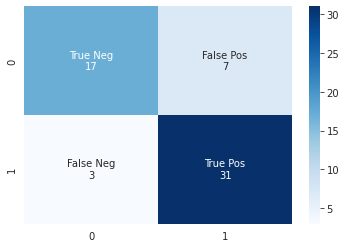

In [81]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Também podemos usar o **classification_report** que é um relatório de classificação usado para medir a qualidade das previsões de um algoritmo de classificação, ou seja, referente a sua classificação da variável target (0 e 1).

1. *Precision*: Porcentagem de previsões positivas corretas em relação ao total de previsões positivas.

2. *Recall*: Porcentagem de previsões positivas corretas em relação ao total de positivos reais.

3. *F1-score*: Uma média harmônica ponderada de precisão e recall. Quanto mais próximo de 1, melhor o modelo.

In [82]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.82      0.91      0.86        34

    accuracy                           0.83        58
   macro avg       0.83      0.81      0.82        58
weighted avg       0.83      0.83      0.82        58



Podemos tirar de conclusão que o algoritmo de Regressão Logística teve um bom resultado para o dataset em questão. 